
## Metricas de avaliação de Clusters

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from pyclustertend import hopkins, vat,ivat, assess_tendency_by_metric, assess_tendency_by_mean_metric_score

In [6]:
# Removendo warnings chatos
import warnings
warnings.filterwarnings('ignore')

In [7]:
#cluster com iris
iris = datasets.load_iris()
cluster = KMeans(n_clusters = 3)
clus = cluster.fit_predict(iris.data)
print(clus)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


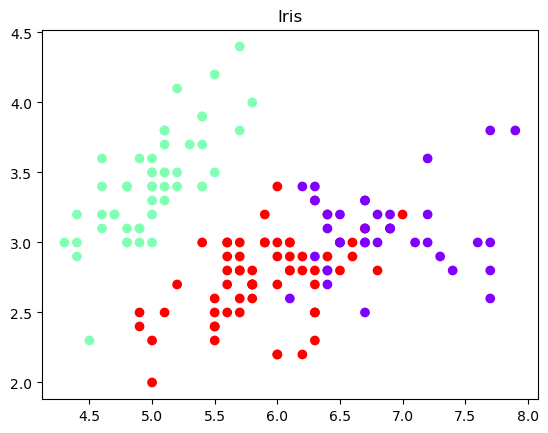

In [8]:
#impressão do cluster
plt.title('Iris')
plt.scatter(iris.data[:,0], iris.data[:,1], c = clus, cmap="rainbow")
plt.show()

In [9]:
#criamos dois objetos para clusterização
clust1 = scale(iris.data)
#mesmas dimensões de Iris
clust2 = np.random.rand(150,4)
print(clust2)

[[3.99554883e-01 1.17064301e-01 5.43593486e-01 3.65061818e-02]
 [5.22815792e-01 8.53256591e-03 7.59016237e-01 2.43271268e-01]
 [7.55475067e-01 5.76154571e-01 2.99075315e-01 8.38826481e-03]
 [1.73099204e-01 3.65456695e-01 8.89326756e-01 8.26857819e-01]
 [9.84427388e-01 3.51280947e-01 6.65794010e-02 8.55252971e-01]
 [4.65134114e-01 2.04146404e-01 1.79816714e-01 7.09088153e-01]
 [3.92594837e-02 6.95780767e-01 3.97357063e-01 7.69869823e-01]
 [7.49043817e-01 7.24592700e-02 7.62666404e-01 3.32110908e-02]
 [8.80095171e-01 1.51627993e-01 3.71160495e-01 1.78440631e-01]
 [5.82505071e-01 4.89802689e-01 6.14835042e-01 1.50184171e-02]
 [2.79089099e-01 1.55576943e-01 7.23410540e-01 5.49605466e-01]
 [4.62883627e-01 5.08909921e-01 3.65278348e-01 2.71208459e-01]
 [6.35198476e-01 5.48131298e-01 9.08482489e-01 4.69201436e-01]
 [9.34621250e-01 2.91422877e-01 6.61462894e-01 6.29092907e-01]
 [2.33038767e-02 4.47701453e-01 8.36265579e-01 4.71911891e-01]
 [7.89374366e-01 2.25355104e-01 6.88517411e-01 7.810212

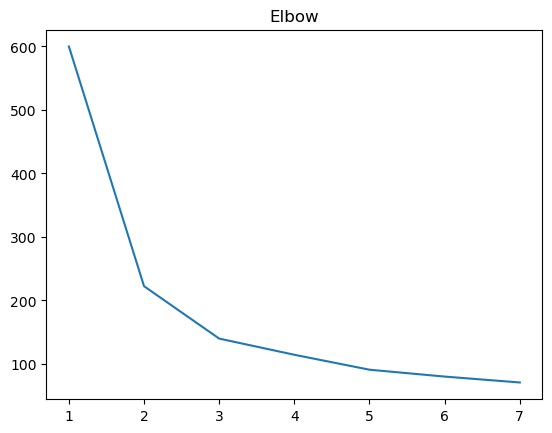

In [10]:
# within-cluster sum-of-squares pode ser encontrado no atributo inertia do cluster
inertia =[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(clust1)
    kmeans.fit(clust1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 8), inertia)
plt.title('Elbow')
plt.show()

In [11]:
#caapcidade de cluster
#mais proximo de zero maior capacidade
hopkins(clust1,150)

0.18818847967625435

In [12]:
hopkins(clust2,150)

0.51784041723851

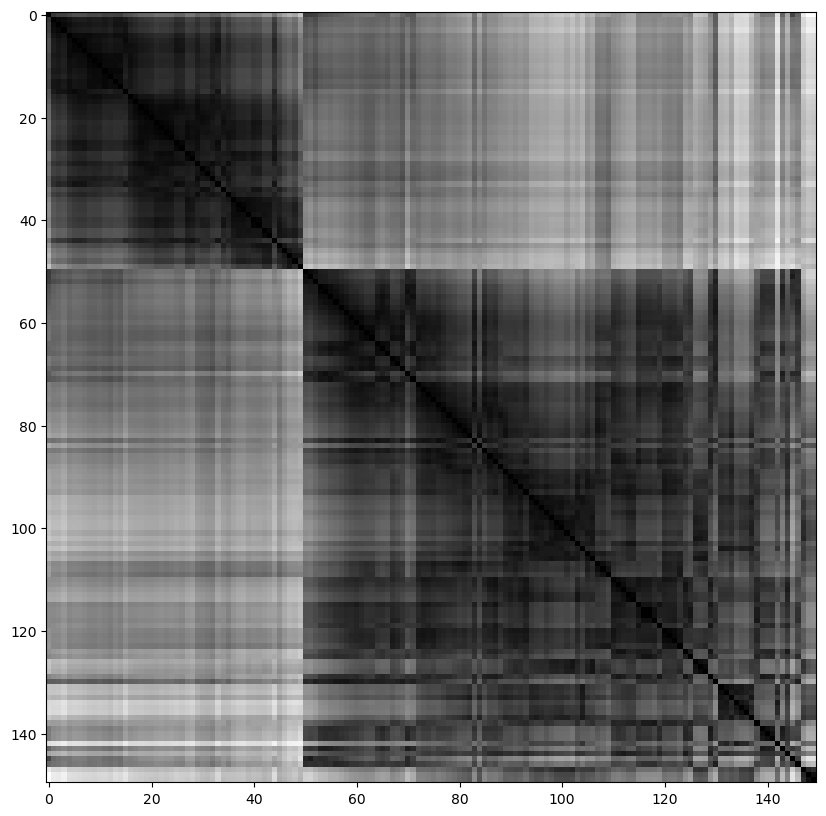

In [13]:
#Visual assesement of tendency
vat(clust1)

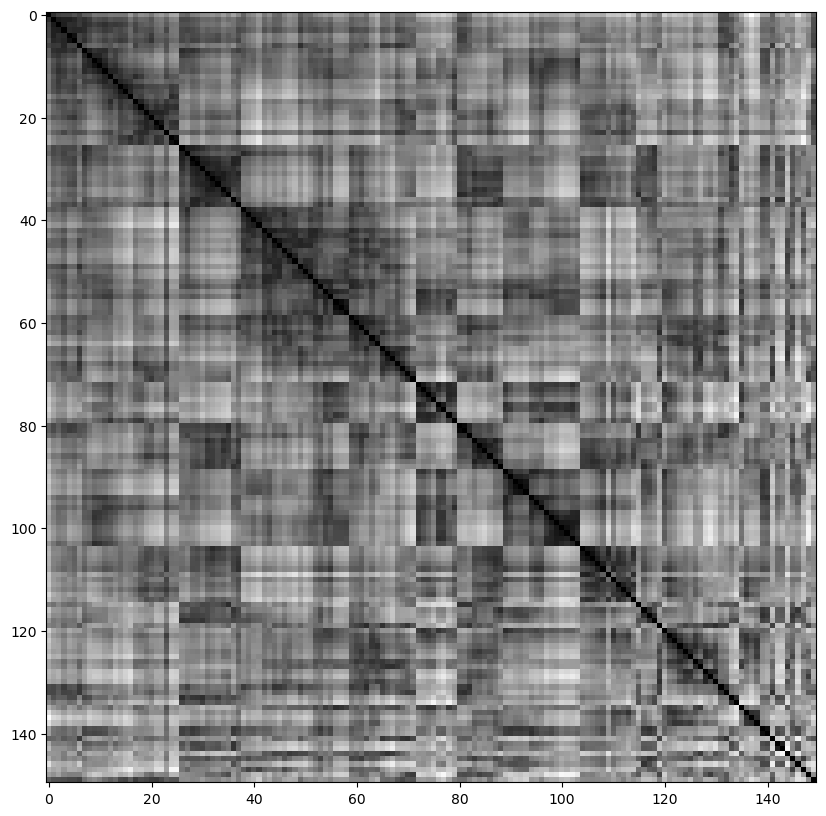

In [14]:
vat(clust2)

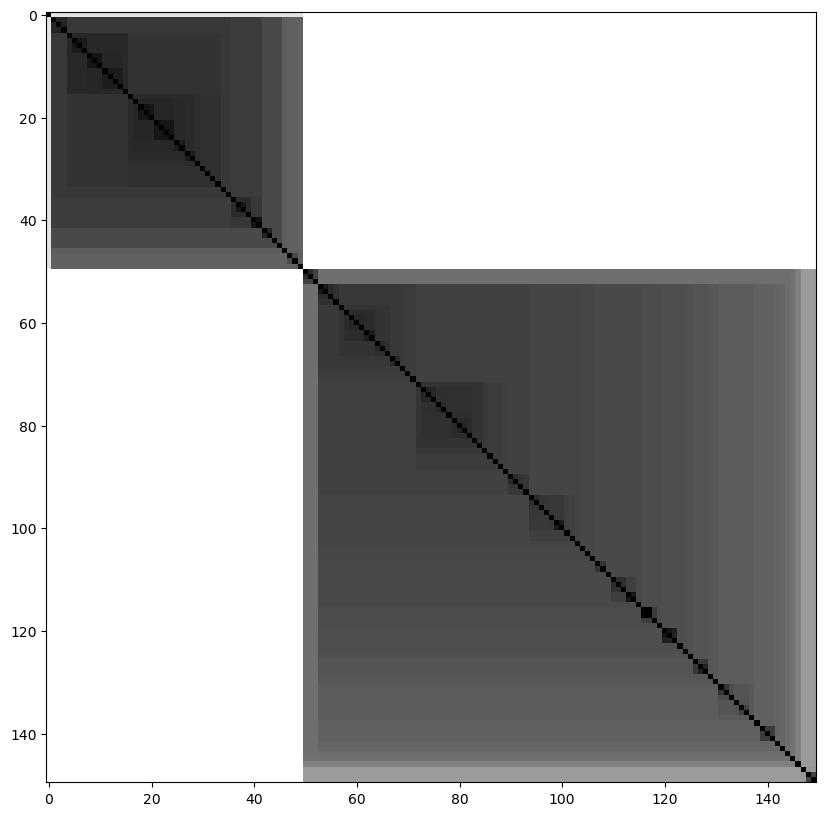

In [15]:
#outra versão
ivat(clust1)  

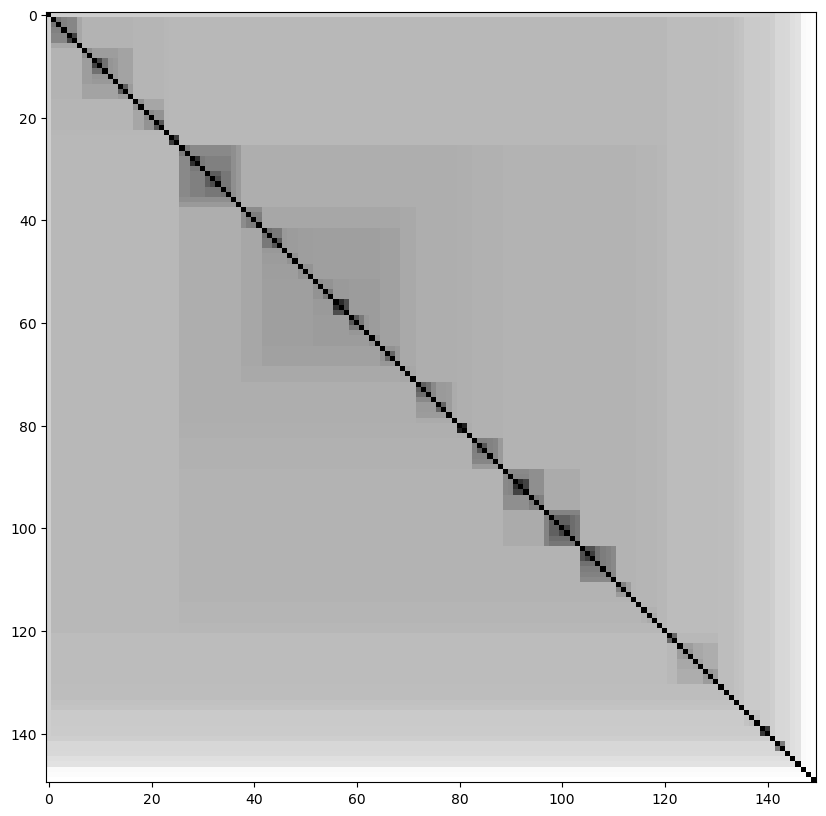

In [16]:
ivat(clust2)  

In [17]:
# avalia a qualidade dos dados 
#métodos  'silhouette', 'calinski_harabasz', 'davies_bouldin'    
#dados, método, número máximo de clusters
#retona o número ideial de cluster a valor de silhouette para cada um
#silhouette busca minimizar
m = assess_tendency_by_metric(clust1,'silhouette',5 )
print(m)

(2, array([0.58175005, 0.46304204, 0.38385092, 0.34380827]))


In [18]:
m = assess_tendency_by_metric(clust2,'silhouette',5 )
print(m)

(5, array([0.20860531, 0.22458918, 0.24286625, 0.25067158]))


In [19]:
#retorna o número médio do melhor número de clusters dos três métodos
m = assess_tendency_by_mean_metric_score(clust1,5 )
print(m)

2.0


In [20]:
m = assess_tendency_by_mean_metric_score(clust2,5 )
print(m)


5.0


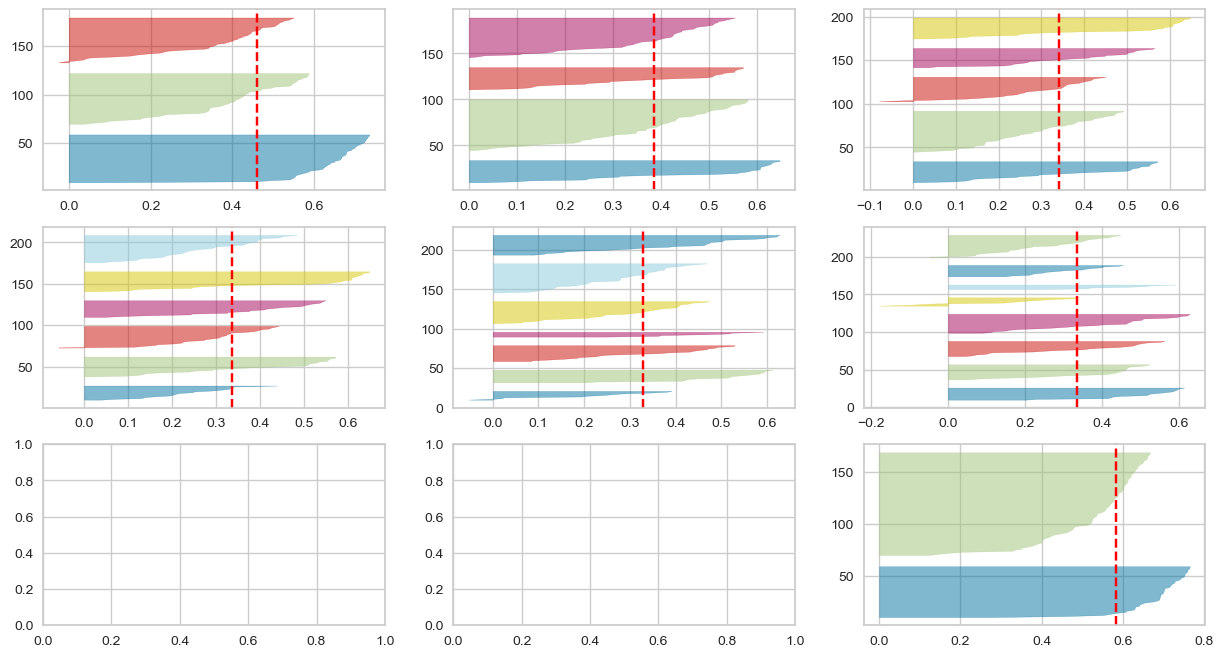

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters = i)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(clust1) 

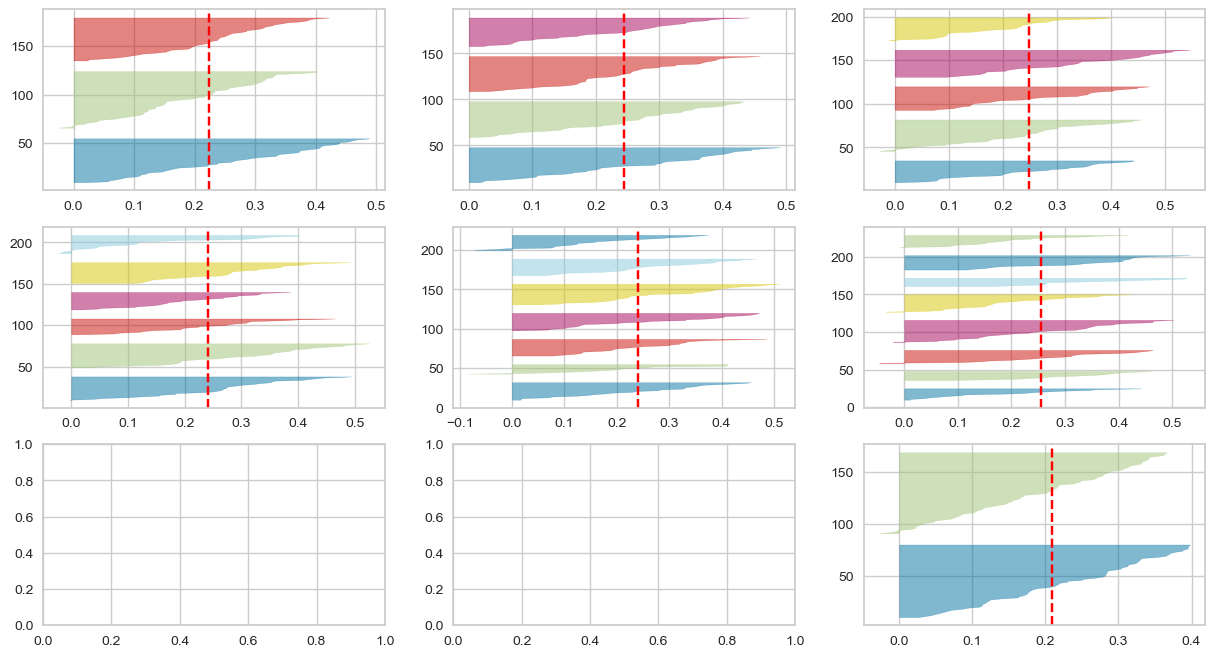

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters = i)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(clust2) 

A pontuação de silhueta para um conjunto de pontos de dados de amostra é usada para medir o quão densos e bem separados são os clusters.

O escore silhueta leva em consideração a distância intra-cluster entre a amostra e outros pontos de dados dentro do mesmo cluster (a) e a distância entre os conglomerados entre a amostra e o próximo cluster mais próximo (b).

A pontuação da silhueta está dentro do intervalo [-1, 1].
A pontuação da silhueta de 1 significa que os aglomerados são muito densos e bem separados. A pontuação de 0 significa que os clusters estão sobrepostos. A pontuação inferior a 0 significa que os dados pertencentes a clusters podem estar errados/incorretos.

Os gráficos de silhueta podem ser usados para selecionar o valor mais ótimo do K (no. de cluster) no agrupamento K-means.

Os aspectos a serem observados nos gráficos de silhueta são pontuações de cluster abaixo do escore médio de silhueta, grandes flutuações no tamanho dos aglomerados e também a espessura do gráfico de silhueta.